# Predicting Total Claims Payments by the Insurance Company

### Workers' compensation is a form of insurance providing wage replacement and medical benefits to employees injured in the course of employment.
In exchange for this coverage, the employee has to relinquish his right to sue his employer in the case of an incident. The system of collective liability was created to prevent employers from becoming insolvent as a result of high damage awards, and thus to ensure the security of compensation to the workers. 



### Step 1: Import Libraries

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib import ticker, gridspec
%matplotlib inline
from IPython.display import Image
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

### Step 2: Import Dataset

In [32]:

dataframe = pd.read_csv('data.csv')

In [33]:
print(dataframe.info())
#dataframe.select_dtypes(exclude=object).describe()
print(dataframe.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClaimNumber                 54000 non-null  object 
 1   DateTimeOfAccident          54000 non-null  object 
 2   DateReported                54000 non-null  object 
 3   Age                         54000 non-null  int64  
 4   Gender                      54000 non-null  object 
 5   MaritalStatus               53971 non-null  object 
 6   DependentChildren           54000 non-null  int64  
 7   DependentsOther             54000 non-null  int64  
 8   WeeklyWages                 54000 non-null  float64
 9   PartTimeFullTime            54000 non-null  object 
 10  HoursWorkedPerWeek          54000 non-null  float64
 11  DaysWorkedPerWeek           54000 non-null  int64  
 12  ClaimDescriptionKeyword_0   54000 non-null  float64
 13  ClaimDescriptionKeyword_1   540

### Step3: Data Cleaning

In [34]:
dataframe.select_dtypes(include=object).nunique()

ClaimNumber           54000
DateTimeOfAccident    36673
DateReported           6653
Gender                    3
MaritalStatus             3
PartTimeFullTime          2
dtype: int64

In [35]:
#finding null values
dataframe.isnull().sum()
#dataframe.isna().sum()

ClaimNumber                    0
DateTimeOfAccident             0
DateReported                   0
Age                            0
Gender                         0
MaritalStatus                 29
DependentChildren              0
DependentsOther                0
WeeklyWages                    0
PartTimeFullTime               0
HoursWorkedPerWeek             0
DaysWorkedPerWeek              0
ClaimDescriptionKeyword_0      0
ClaimDescriptionKeyword_1      0
ClaimDescriptionKeyword_2      0
ClaimDescriptionKeyword_3      0
ClaimDescriptionKeyword_4      0
ClaimDescriptionKeyword_5      0
ClaimDescriptionKeyword_6      0
ClaimDescriptionKeyword_7      0
ClaimDescriptionKeyword_8      0
ClaimDescriptionKeyword_9      0
ClaimDescriptionKeyword_10     0
ClaimDescriptionKeyword_11     0
InitialIncurredClaimsCost      0
UltimateIncurredClaimCost      0
dtype: int64

In [36]:
#we will replace null values in MaritalStatue to the mean in the MaritalStatus column
#dataframe.MaritalStatus.fillna(value = dataframe.MaritalStatus.mean(), inplace=True)

In [37]:
dataframe.dropna()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,...,-0.137039,1.634239,-1.436096,-0.757871,-1.091920,0.880767,0.168497,1.161294,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,...,1.788994,0.459482,0.662757,-0.240500,-0.162451,0.665242,0.844019,-1.305332,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,...,-0.045712,-0.192742,-0.047881,0.139051,-0.339551,-0.386420,-0.397919,-0.259750,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,...,0.067053,1.105471,0.609462,1.495272,-0.527257,-0.187209,-0.857031,-0.343594,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,...,-0.647481,-1.413973,-0.807369,0.243139,1.031237,0.366183,0.427945,-0.038234,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,WC9370727,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,...,0.671885,-0.551931,0.609996,0.004547,-0.080993,0.244063,0.633730,-1.078211,1000,480.493308
53996,WC8396269,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,...,2.316328,0.649956,0.760474,-0.230762,-0.971785,0.310966,-1.879551,-0.299992,1000,755.735319
53997,WC3609528,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,...,-0.493861,0.217121,-0.487354,0.445688,0.847410,-1.123457,0.687752,0.087566,210,418.178461
53998,WC5038565,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,...,-1.191801,-0.380672,-0.589854,-0.078175,0.266576,-0.823754,-0.266269,0.199324,7500,2695.225700


In [38]:
# we will drop the ClaimNumber column as its unneccessary 
dataframe.drop("ClaimNumber", axis=1, inplace = True)

In [39]:
dataframe.loc[dataframe['Gender'] == 'U']
dataframe

,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,...,-0.137039,1.634239,-1.436096,-0.757871,-1.091920,0.880767,0.168497,1.161294,1500,4748.203388
1,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,...,1.788994,0.459482,0.662757,-0.240500,-0.162451,0.665242,0.844019,-1.305332,5500,6326.285819
2,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,...,-0.045712,-0.192742,-0.047881,0.139051,-0.339551,-0.386420,-0.397919,-0.259750,1700,2293.949087
3,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,...,0.067053,1.105471,0.609462,1.495272,-0.527257,-0.187209,-0.857031,-0.343594,15000,17786.487170
4,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,...,-0.647481,-1.413973,-0.807369,0.243139,1.031237,0.366183,0.427945,-0.038234,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,38.0,...,0.671885,-0.551931,0.609996,0.004547,-0.080993,0.244063,0.633730,-1.078211,1000,480.493308
53996,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,40.0,...,2.316328,0.649956,0.760474,-0.230762,-0.971785,0.310966,-1.879551,-0.299992,1000,755.735319
53997,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,40.0,...,-0.493861,0.217121,-0.487354,0.445688,0.847410,-1.123457,0.687752,0.087566,210,418.178461
53998,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,38.0,...,-1.191801,-0.380672,-0.589854,-0.078175,0.266576,-0.823754,-0.266269,0.199324,7500,2695.225700


In [40]:
dataframe = dataframe[dataframe['Gender'] != 'U']

In [41]:
dataframe

,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,...,-0.137039,1.634239,-1.436096,-0.757871,-1.091920,0.880767,0.168497,1.161294,1500,4748.203388
1,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,...,1.788994,0.459482,0.662757,-0.240500,-0.162451,0.665242,0.844019,-1.305332,5500,6326.285819
2,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,...,-0.045712,-0.192742,-0.047881,0.139051,-0.339551,-0.386420,-0.397919,-0.259750,1700,2293.949087
3,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,...,0.067053,1.105471,0.609462,1.495272,-0.527257,-0.187209,-0.857031,-0.343594,15000,17786.487170
4,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,...,-0.647481,-1.413973,-0.807369,0.243139,1.031237,0.366183,0.427945,-0.038234,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,38.0,...,0.671885,-0.551931,0.609996,0.004547,-0.080993,0.244063,0.633730,-1.078211,1000,480.493308
53996,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,40.0,...,2.316328,0.649956,0.760474,-0.230762,-0.971785,0.310966,-1.879551,-0.299992,1000,755.735319
53997,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,40.0,...,-0.493861,0.217121,-0.487354,0.445688,0.847410,-1.123457,0.687752,0.087566,210,418.178461
53998,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,38.0,...,-1.191801,-0.380672,-0.589854,-0.078175,0.266576,-0.823754,-0.266269,0.199324,7500,2695.225700


### Step 3: Analyze Data

### Gender Variables

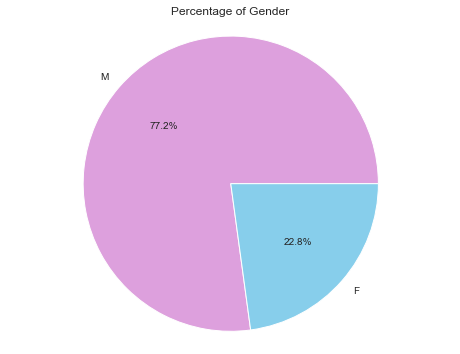

In [42]:
#Percentage of data represented by gender
#We'll create a pie chart to visualize percentages
labels = dataframe.Gender.value_counts().index
sizes = dataframe.Gender.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=("plum", "skyblue","white"))
plt.axis("equal") #Equal aspect ratio ensures pie is drawn in circle
plt.title("Percentage of Gender")
plt.show()

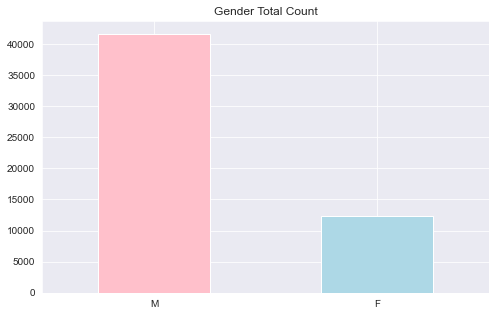

In [43]:
#Total sum of Genders show that males are more present in this dataset than females
totalgender= dataframe.Gender.value_counts()
totalgender.plot(kind="bar", title = "Gender Total Count", color = ("pink", "lightblue"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

### MaritalStatus Variables

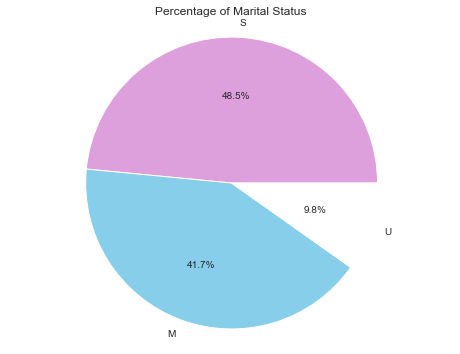

In [44]:
#Percentage of data represented by MaritalStatus
#We'll create a pie chart to visualize percentages
labels = dataframe.MaritalStatus.value_counts().index
sizes = dataframe.MaritalStatus.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels,autopct="%1.1f%%", colors=("plum", "skyblue","white"))
plt.axis("equal") #Equal aspect ratio ensures pie is drawn in circle
plt.title("Percentage of Marital Status")
plt.show()

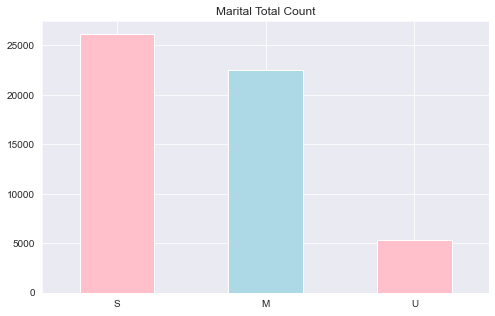

In [45]:
#Total sum of Marital Status show that singles are more present in this dataset than married
totalmarital= dataframe.MaritalStatus.value_counts()
totalmarital.plot(kind="bar", title = "Marital Total Count", color = ("pink", "lightblue"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

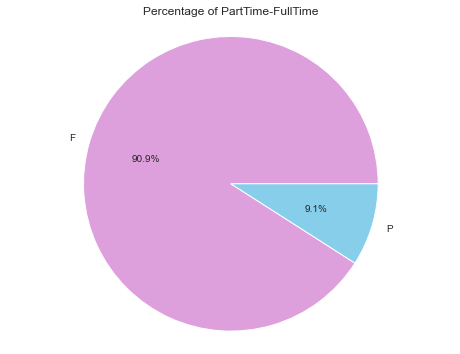

In [46]:
#Percentage of data represented by Part Time or Full Time
#We'll create a pie chart to visualize percentages
labels = dataframe.PartTimeFullTime.value_counts().index
sizes = dataframe.PartTimeFullTime.value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels,autopct="%1.1f%%", colors=("plum", "skyblue","white"))
plt.axis("equal") #Equal aspect ratio ensures pie is drawn in circle
plt.title("Percentage of PartTime-FullTime")
plt.show()

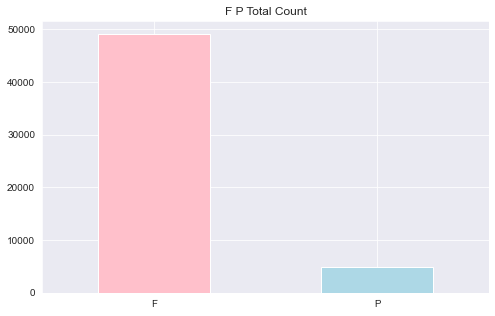

In [47]:
#Total sum of part time or full time show full time employees are more present in this dataset than part time
totalmarital= dataframe.PartTimeFullTime.value_counts()
totalmarital.plot(kind="bar", title = "F P Total Count", color = ("pink", "lightblue"), figsize=(8,5))
plt.xticks(rotation=1)
plt.show()

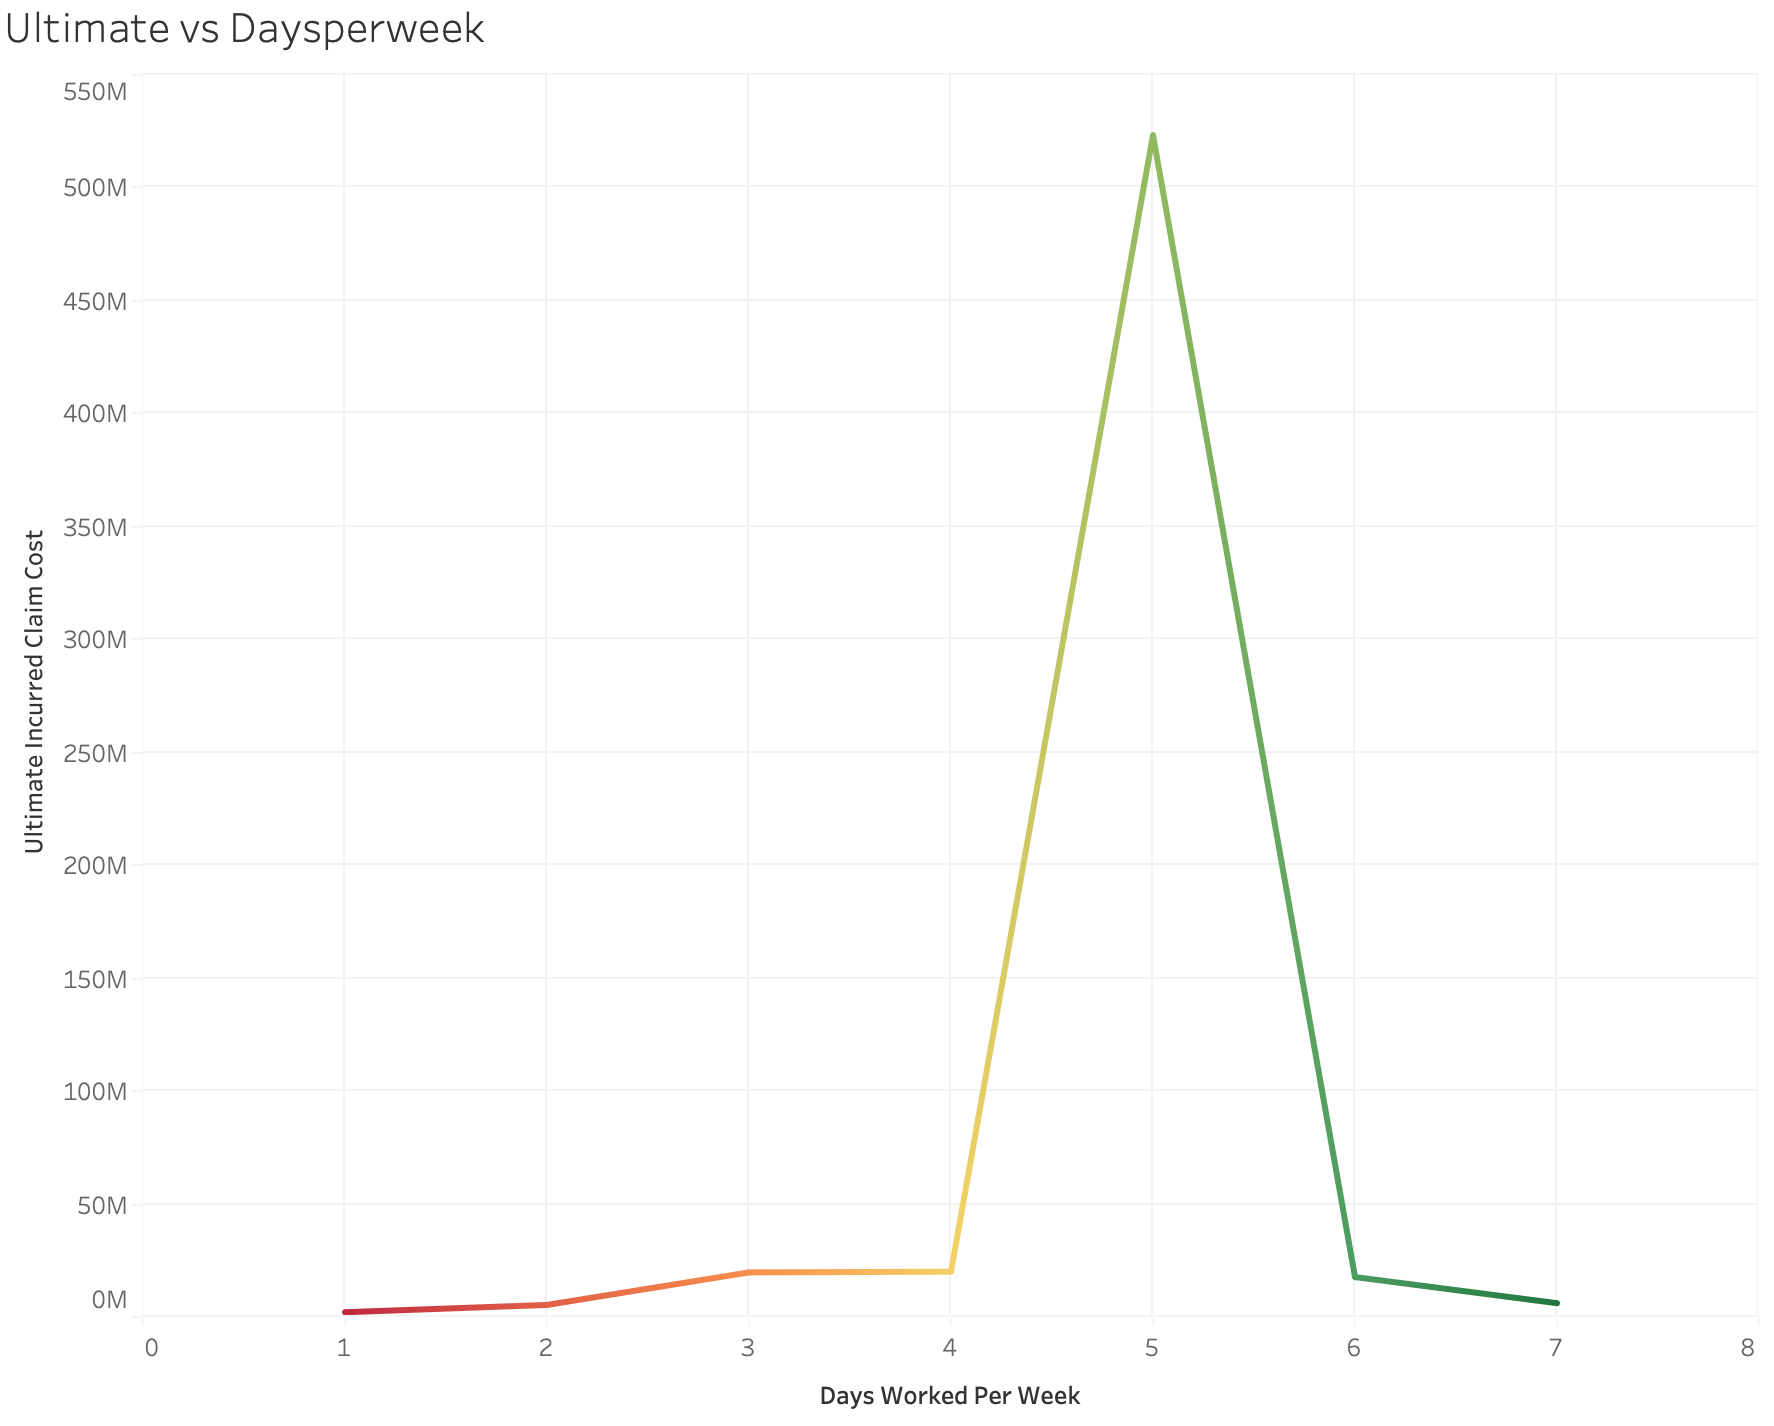

In [48]:
from IPython.display import Image
Image(filename='Ultimate vs Daysperweek.png', width = '500') 

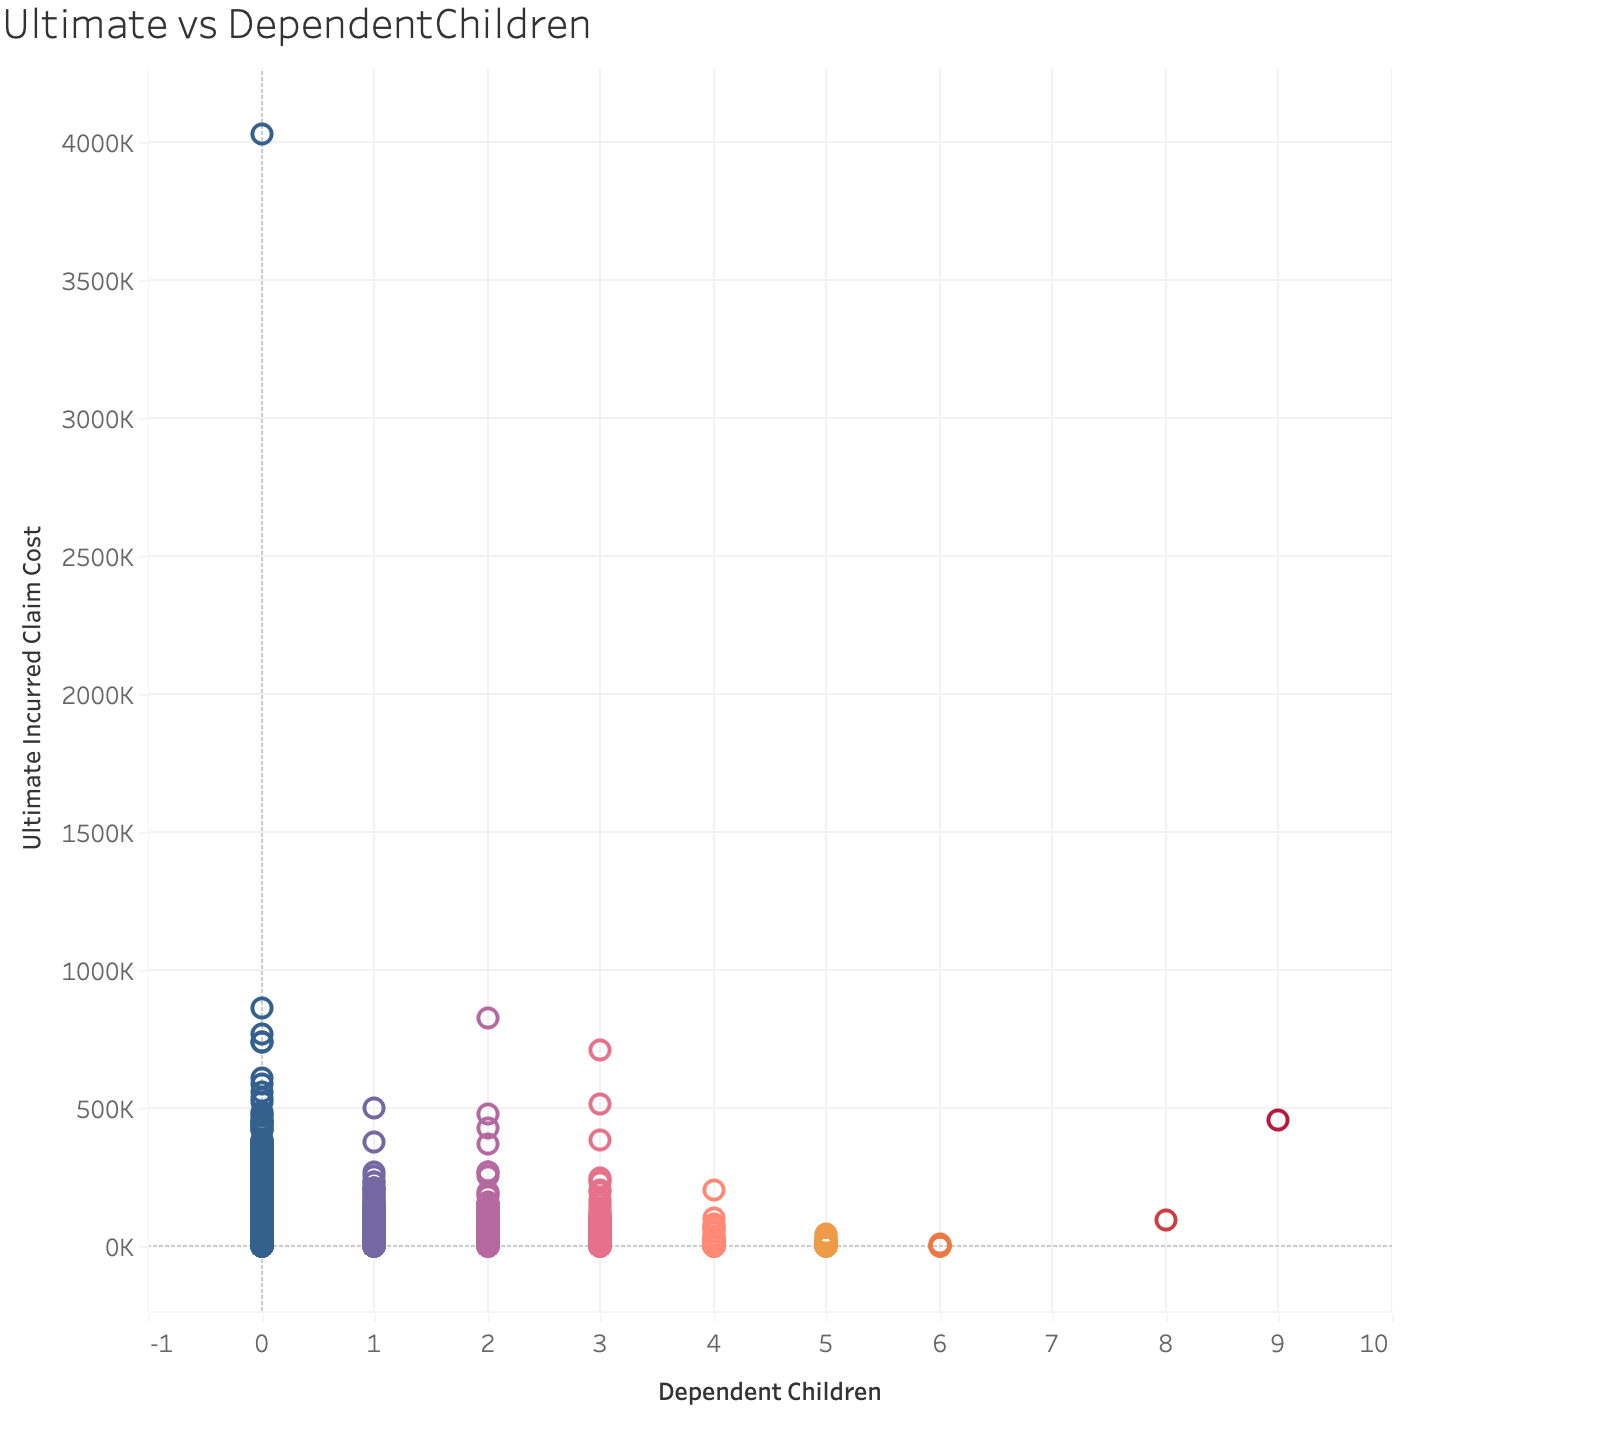

In [49]:
Image(filename='Ultimate vs DependentChildren.png', width = '500') 

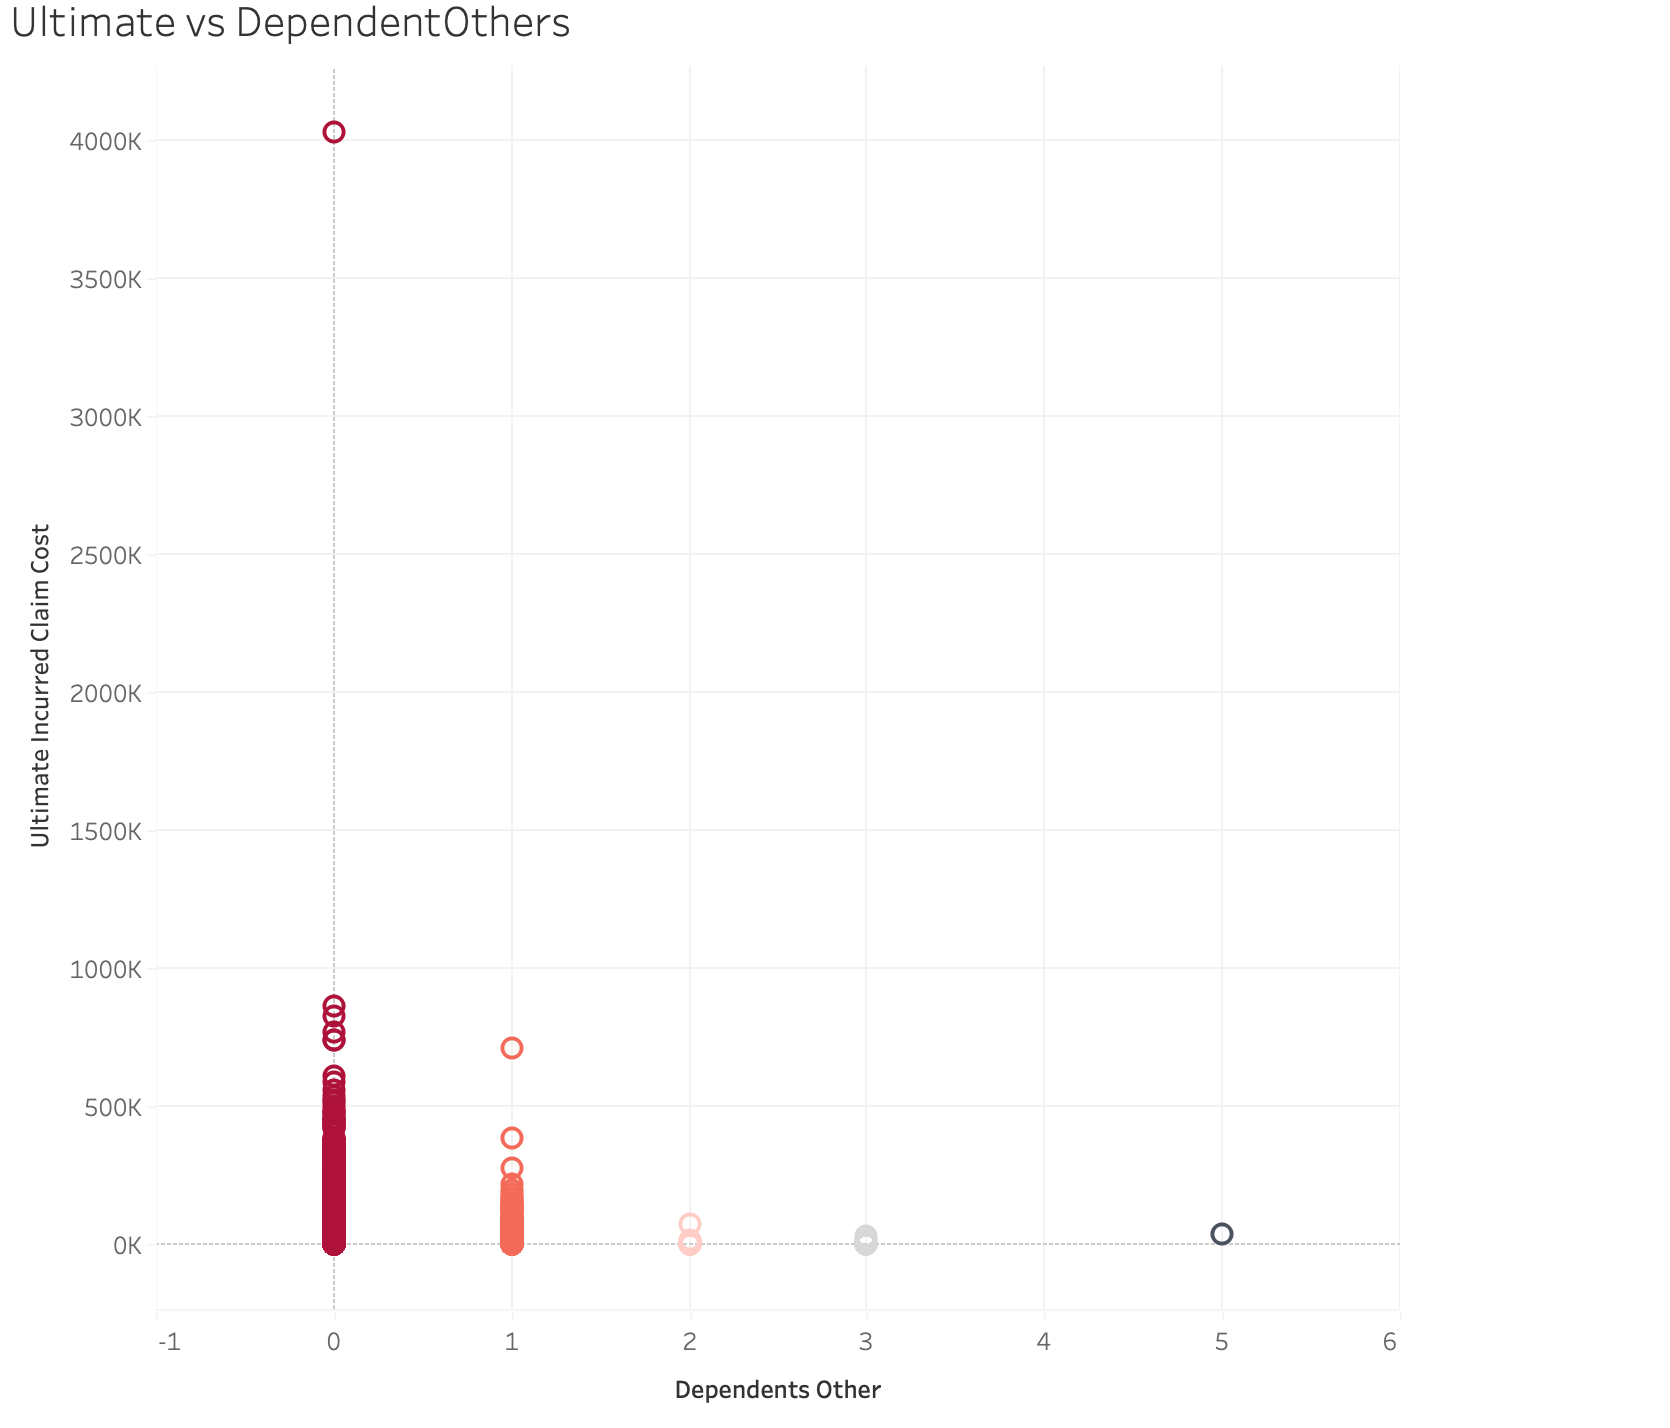

In [50]:
Image(filename='Ultimate vs DependentOthers.png', width = '600') 

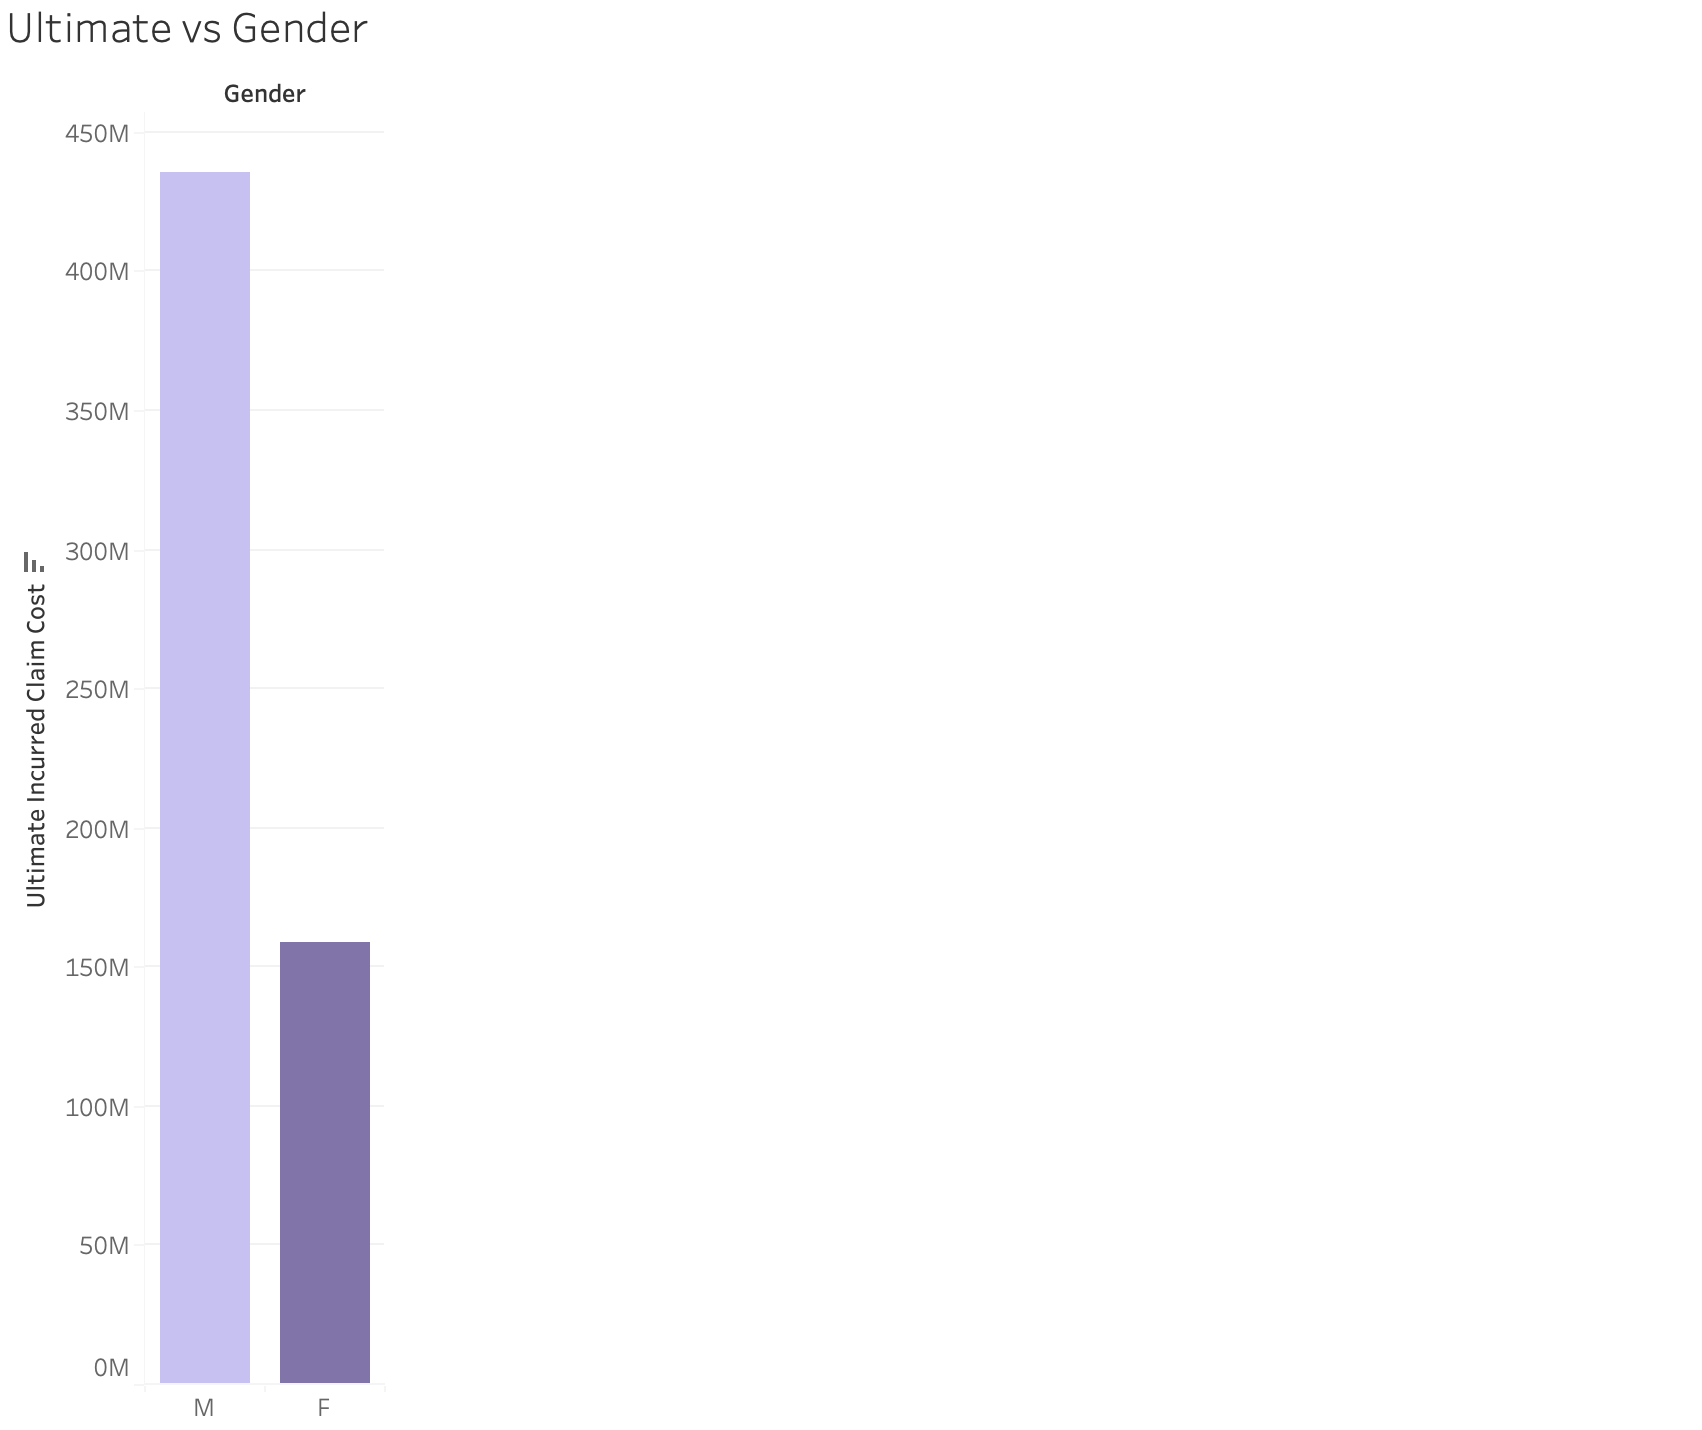

In [51]:
Image(filename='Ultimate vs Gender.png', width = '500') 

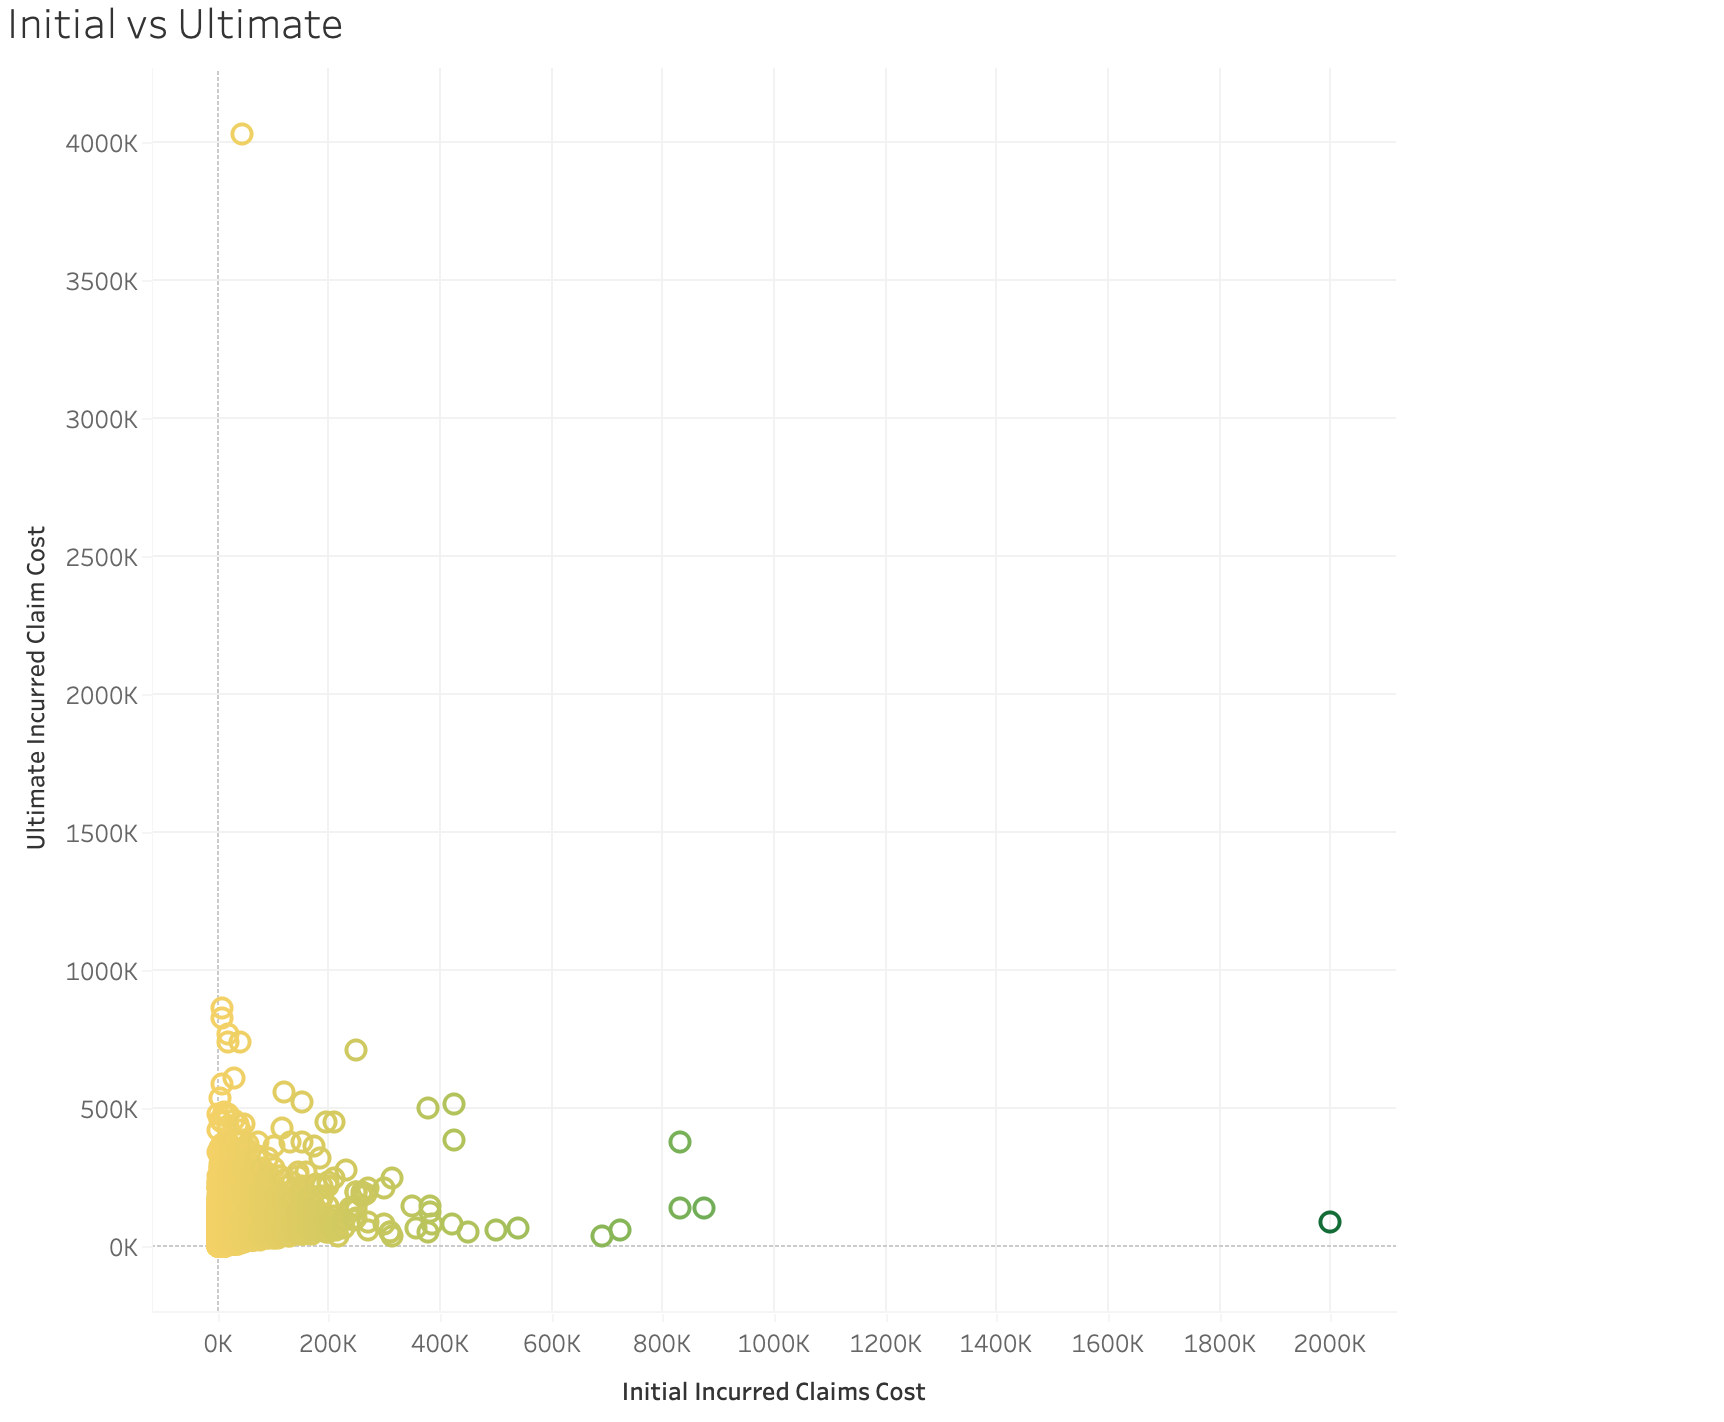

In [52]:
Image(filename='Ultimate vs Initial.png', width = '500')

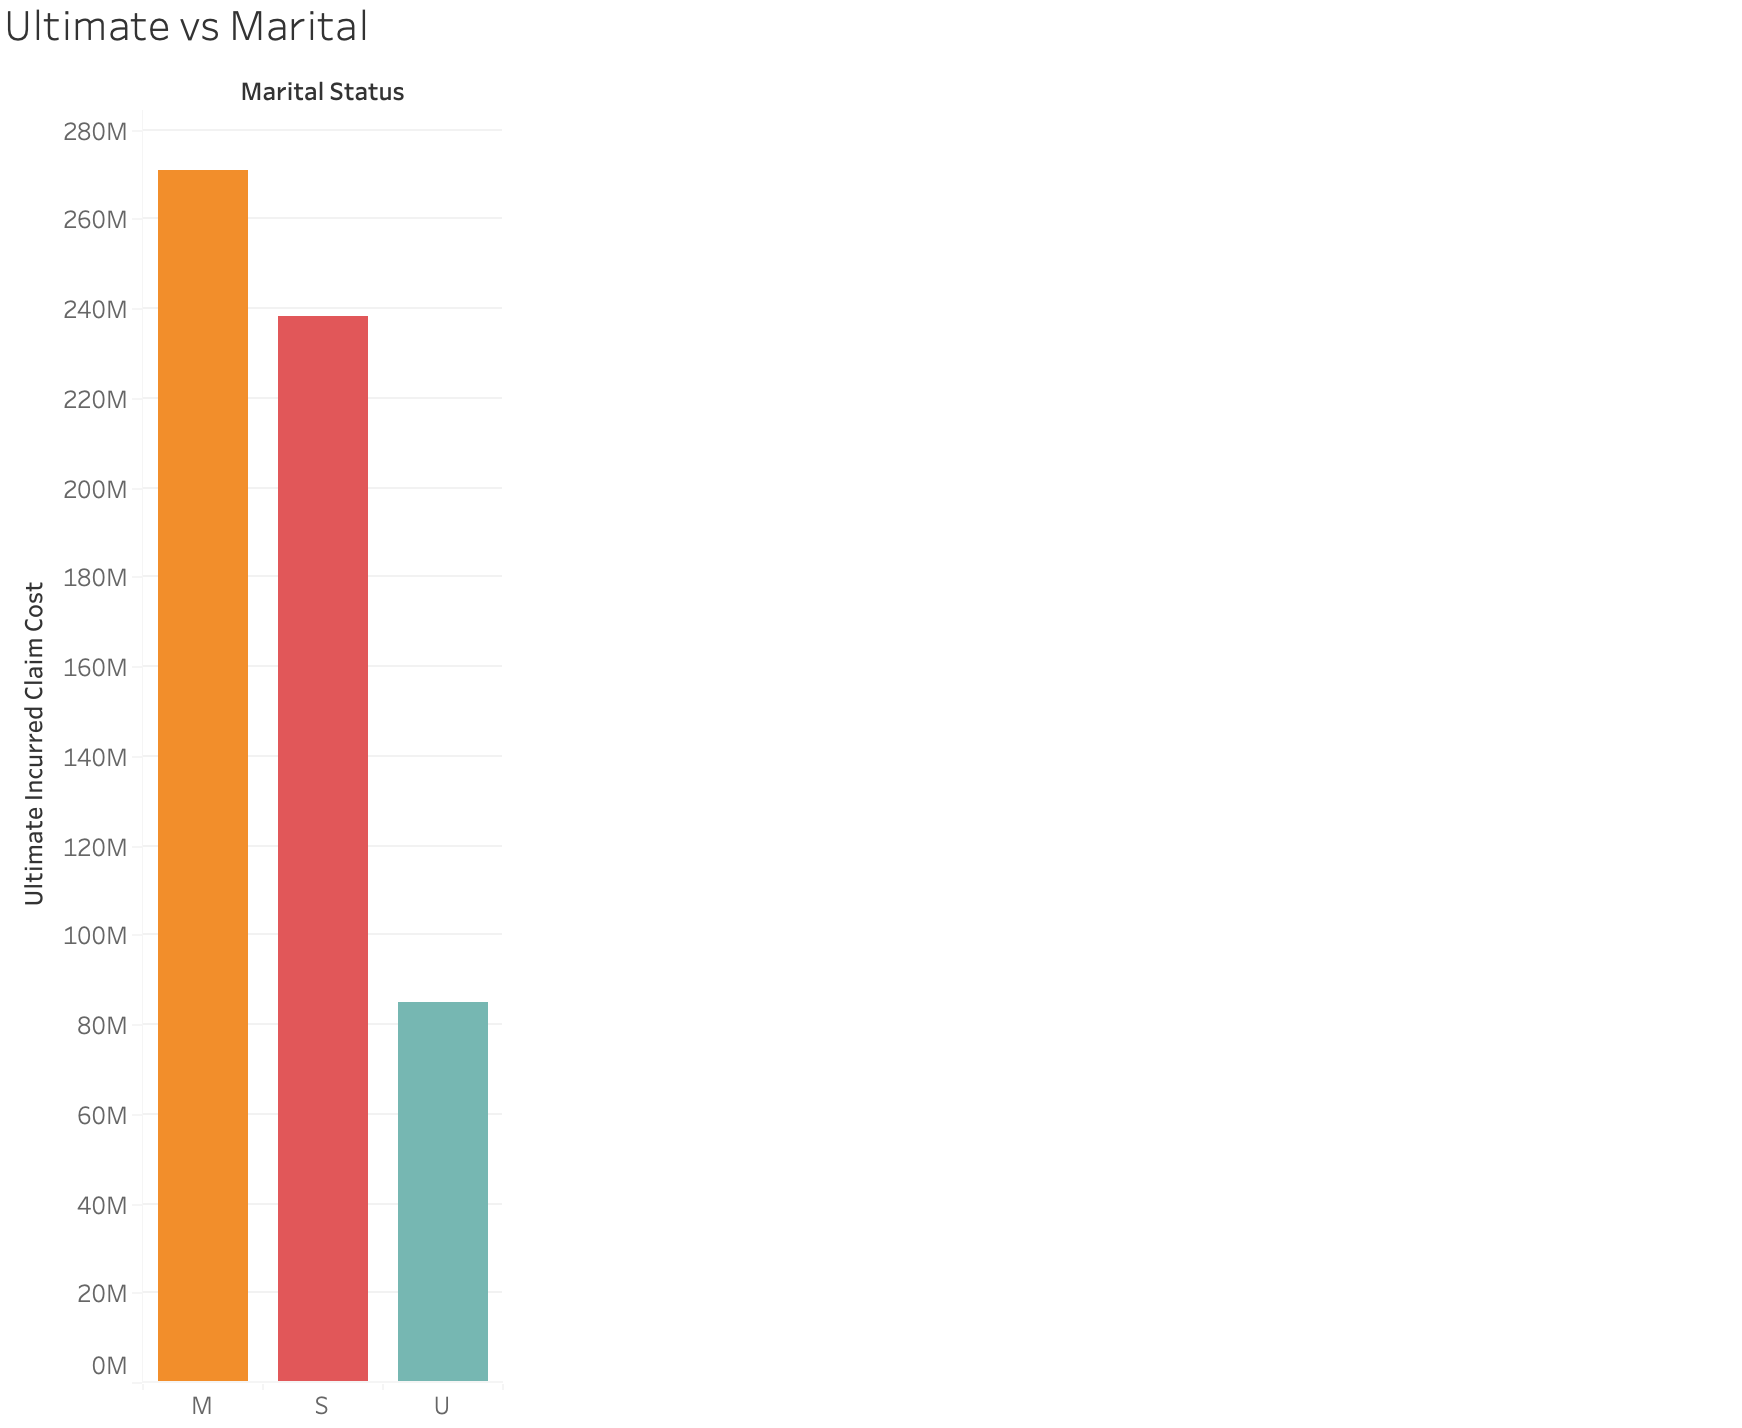

In [53]:
Image(filename='Ultimate vs Marital.png', width = '500')

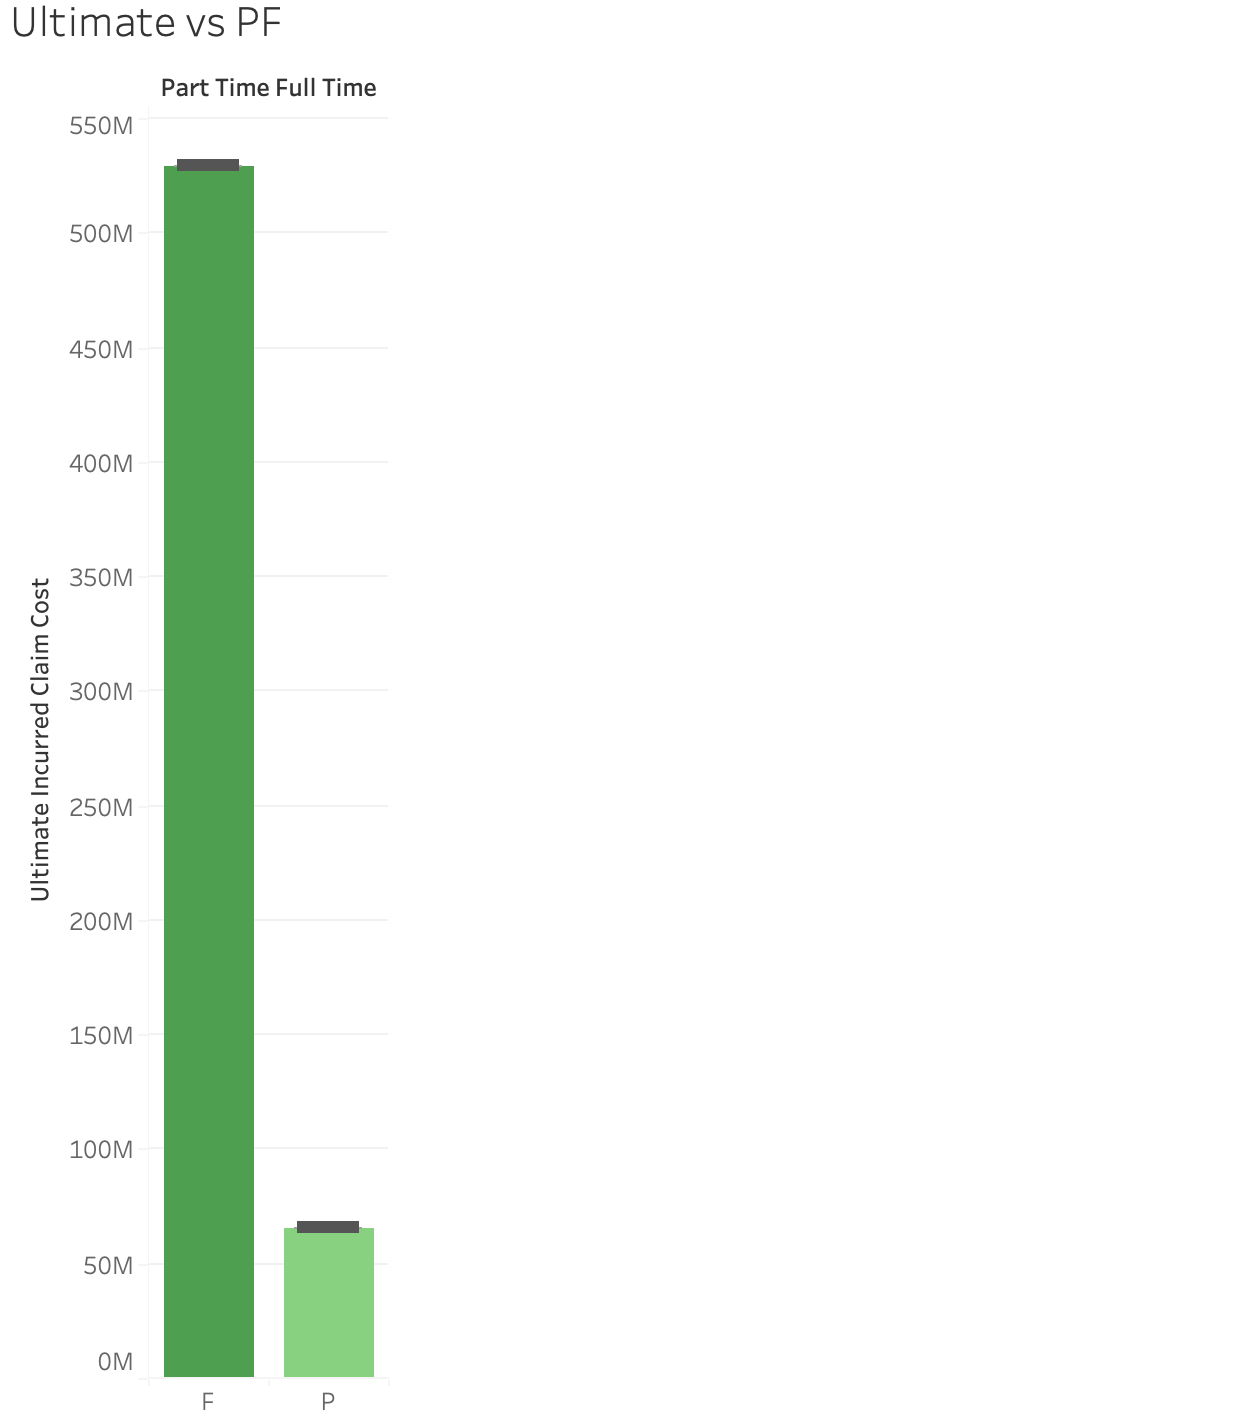

In [54]:
Image(filename='Ultimate vs PF.png', width = '500')

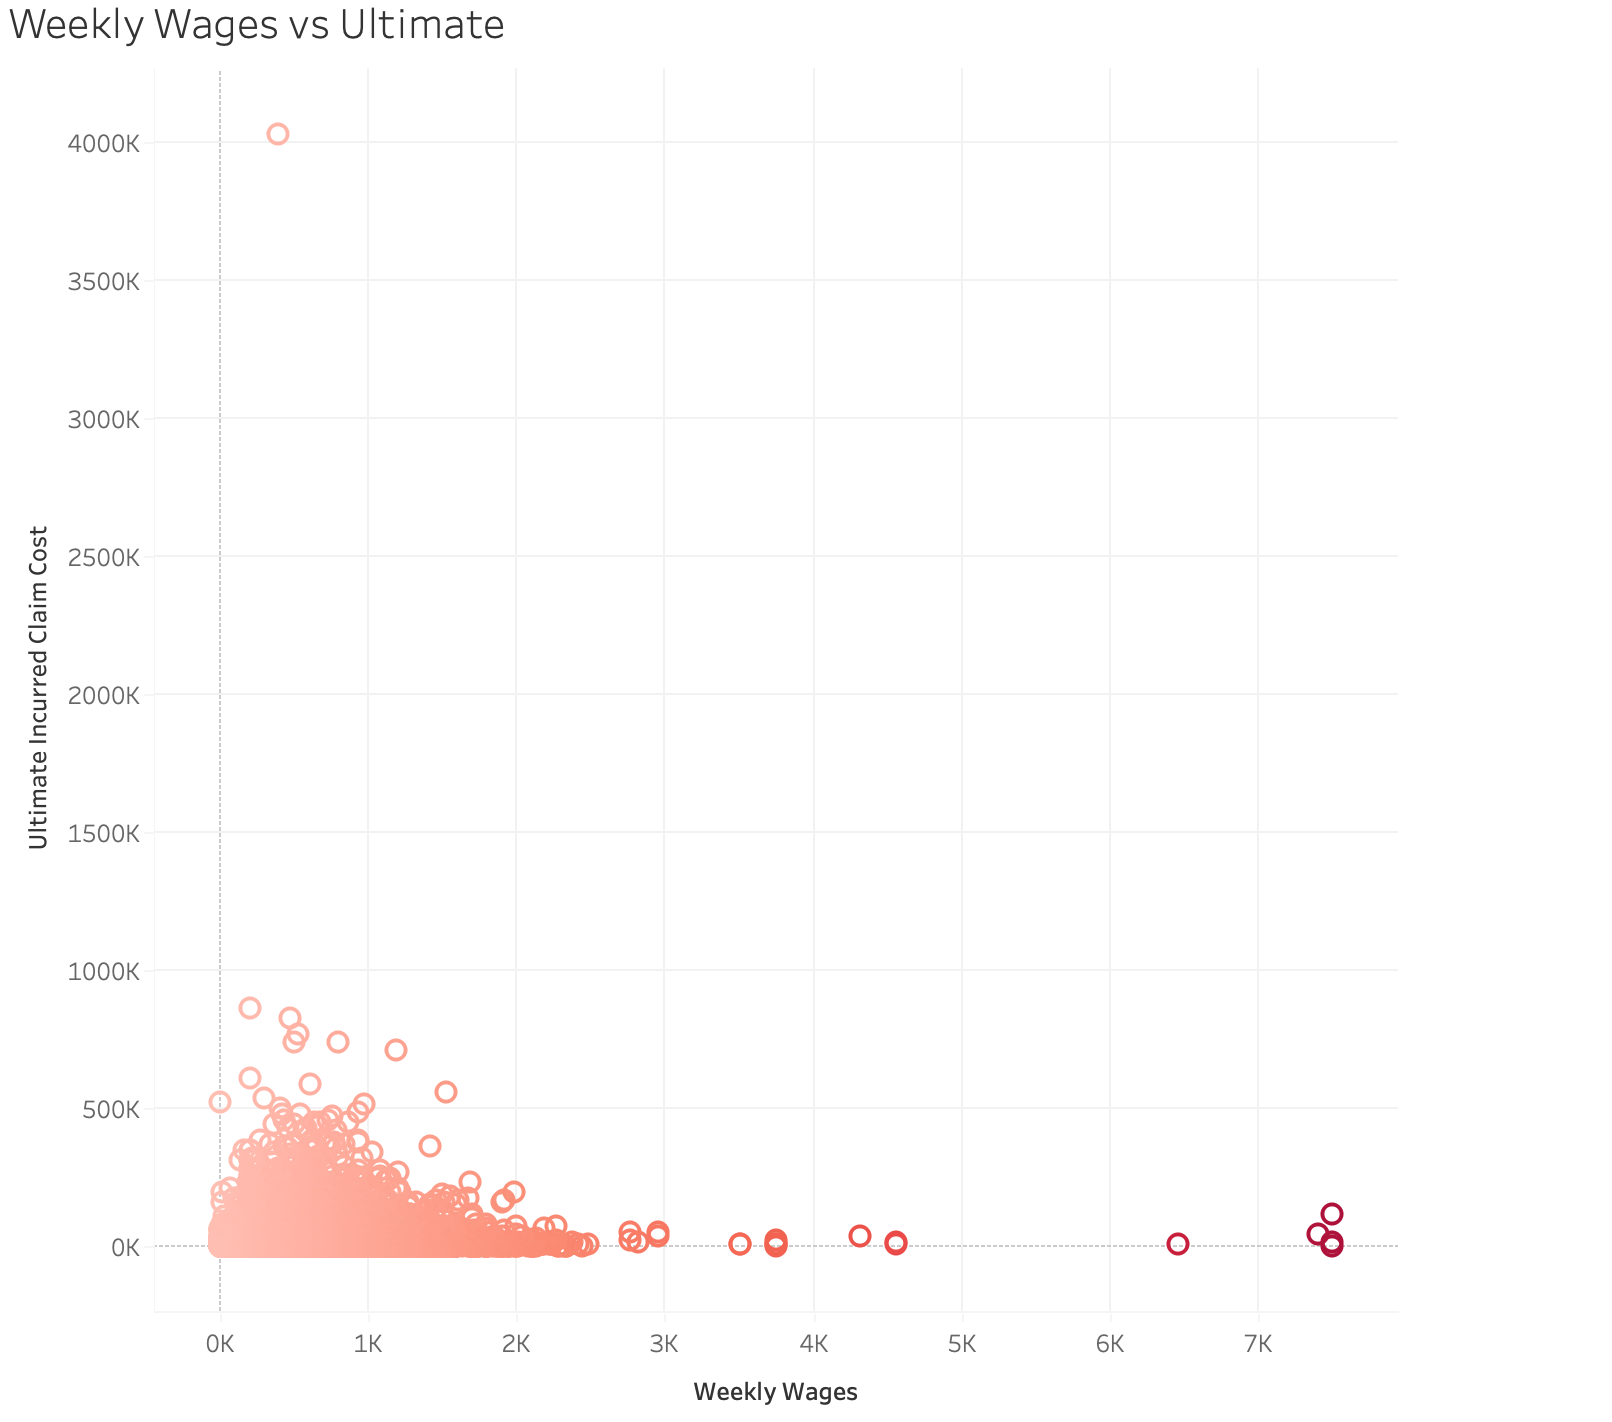

In [55]:
Image(filename='Ultimate vs Weekly Wages.png', width = '500')

In [56]:
dataframe

,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,...,ClaimDescriptionKeyword_4,ClaimDescriptionKeyword_5,ClaimDescriptionKeyword_6,ClaimDescriptionKeyword_7,ClaimDescriptionKeyword_8,ClaimDescriptionKeyword_9,ClaimDescriptionKeyword_10,ClaimDescriptionKeyword_11,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,...,-0.137039,1.634239,-1.436096,-0.757871,-1.091920,0.880767,0.168497,1.161294,1500,4748.203388
1,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,...,1.788994,0.459482,0.662757,-0.240500,-0.162451,0.665242,0.844019,-1.305332,5500,6326.285819
2,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,...,-0.045712,-0.192742,-0.047881,0.139051,-0.339551,-0.386420,-0.397919,-0.259750,1700,2293.949087
3,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,...,0.067053,1.105471,0.609462,1.495272,-0.527257,-0.187209,-0.857031,-0.343594,15000,17786.487170
4,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,...,-0.647481,-1.413973,-0.807369,0.243139,1.031237,0.366183,0.427945,-0.038234,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,38.0,...,0.671885,-0.551931,0.609996,0.004547,-0.080993,0.244063,0.633730,-1.078211,1000,480.493308
53996,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,40.0,...,2.316328,0.649956,0.760474,-0.230762,-0.971785,0.310966,-1.879551,-0.299992,1000,755.735319
53997,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,40.0,...,-0.493861,0.217121,-0.487354,0.445688,0.847410,-1.123457,0.687752,0.087566,210,418.178461
53998,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,38.0,...,-1.191801,-0.380672,-0.589854,-0.078175,0.266576,-0.823754,-0.266269,0.199324,7500,2695.225700


In [57]:
dataframe.drop(['ClaimDescriptionKeyword_0','ClaimDescriptionKeyword_1','ClaimDescriptionKeyword_2',
                'ClaimDescriptionKeyword_3','ClaimDescriptionKeyword_4','ClaimDescriptionKeyword_5',
                'ClaimDescriptionKeyword_6','ClaimDescriptionKeyword_7','ClaimDescriptionKeyword_8',
                'ClaimDescriptionKeyword_9','ClaimDescriptionKeyword_10','ClaimDescriptionKeyword_11'], axis = 1, inplace = True)

/Users/bitapouyanfar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
dataframe

,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredClaimsCost,UltimateIncurredClaimCost
0,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,1500,4748.203388
1,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,5500,6326.285819
2,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,1700,2293.949087
3,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,15000,17786.487170
4,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,38.0,5,1000,480.493308
53996,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,40.0,5,1000,755.735319
53997,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,40.0,5,210,418.178461
53998,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,38.0,5,7500,2695.225700


In [59]:
correlated_dataframe = dataframe.corr()

In [74]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
correlated_dataframe

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredClaimsCost,UltimateIncurredClaimCost
Age,1.000000,0.064217,0.037482,0.176468,0.017315,0.031961,0.114905,0.102720
DependentChildren,0.064217,1.000000,0.197231,0.100867,0.035951,0.012862,0.044038,0.033449
DependentsOther,0.037482,0.197231,1.000000,0.057769,0.009794,0.004481,0.045477,0.027559
WeeklyWages,0.176468,0.100867,0.057769,1.000000,0.175591,0.206141,0.181325,0.151695
HoursWorkedPerWeek,0.017315,0.035951,0.009794,0.175591,1.000000,0.399354,0.007947,0.004543
DaysWorkedPerWeek,0.031961,0.012862,0.004481,0.206141,0.399354,1.000000,0.007461,0.001902
InitialIncurredClaimsCost,0.114905,0.044038,0.045477,0.181325,0.007947,0.007461,1.000000,0.394991
UltimateIncurredClaimCost,0.102720,0.033449,0.027559,0.151695,0.004543,0.001902,0.394991,1.000000


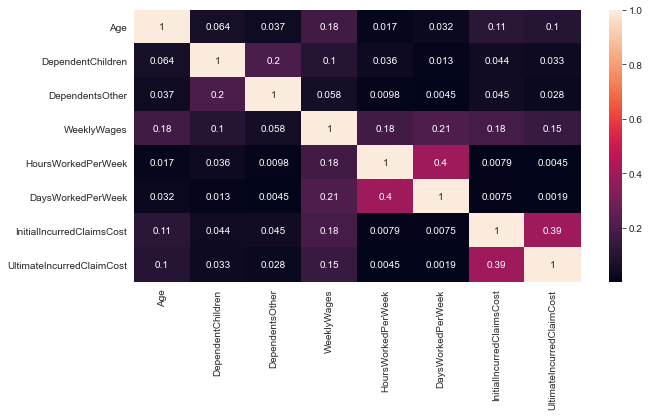

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(correlated_dataframe, annot = True)
#plt.savefig('Finalized.png',dpi=80, bbox_inches='tight')

In [62]:
dataframe.to_csv("Finalized.csv")

#### With conditional formating its very easy to see if there are any correlating factors between UltimateIncurredClaimCost and the other variables.
However overall we don't see any strong correlations (being closer to 1.0) between UltimateIncurredClaimCost and the other units.

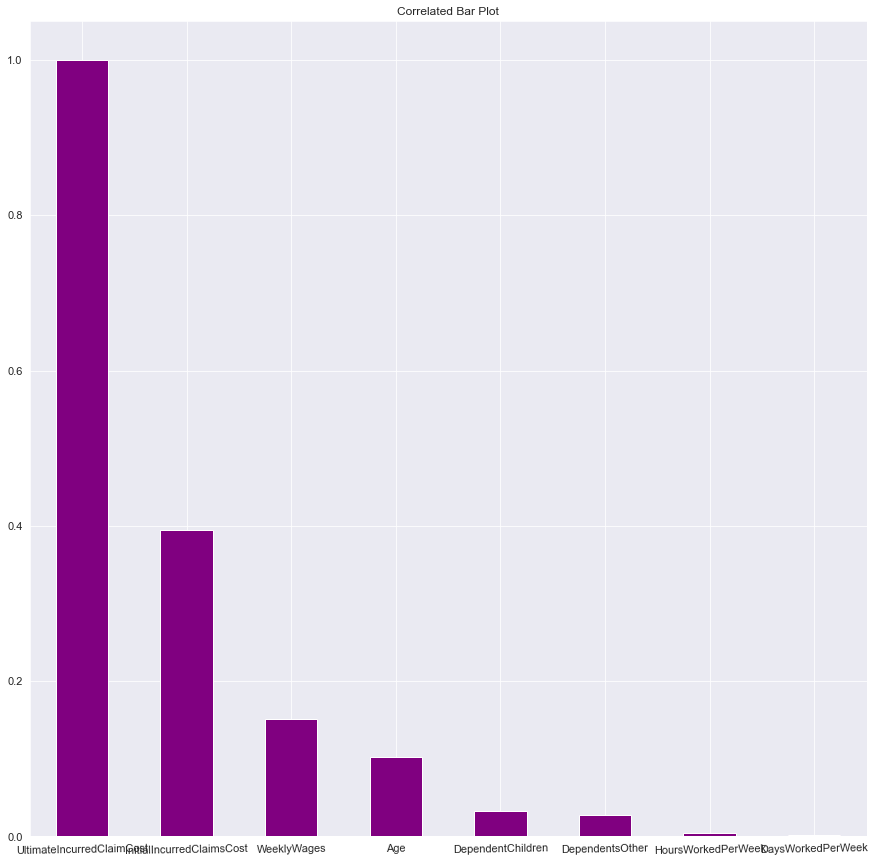

In [63]:
#We'll create a bar plot showing the correlation against UltimateIncurredClaimCost in descending order
plt.figure(figsize=(15,15))
correlated_dataframe= dataframe.corr()
correlated_dataframe["UltimateIncurredClaimCost"].sort_values(ascending=False).plot(kind="bar", title="Correlated Bar Plot", fontsize=11, color="Purple")
plt.xticks(rotation=1) #rotating x marker names for easier reading
plt.show()

In [64]:
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [65]:
dependent_variables = dataframe['UltimateIncurredClaimCost']

In [66]:
dependent_variables

0         4748.203388
1         6326.285819
2         2293.949087
3        17786.487170
4         4014.002925
             ...     
53995      480.493308
53996      755.735319
53997      418.178461
53998     2695.225700
53999      934.273548
Name: UltimateIncurredClaimCost, Length: 53998, dtype: float64

In [67]:
independent_variables = dataframe.drop(['UltimateIncurredClaimCost','DateTimeOfAccident',
                                        'DateReported','Age','Gender','MaritalStatus',
                                        'PartTimeFullTime','DependentsOther','HoursWorkedPerWeek'], axis = 1)

In [68]:
independent_variables

,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredClaimsCost
0,0,500.00,5,1500
1,0,509.34,5,5500
2,0,709.10,5,1700
3,0,555.46,5,15000
4,0,377.10,5,2800
...,...,...,...,...
53995,0,500.00,5,1000
53996,0,500.00,5,1000
53997,0,283.00,5,210
53998,0,200.00,5,7500


In [69]:
independent_variables = sm.add_constant(independent_variables)

In [70]:
regression_model= sm.OLS(dependent_variables,independent_variables).fit() 

In [71]:
prediction = regression_model.predict(independent_variables)

In [72]:
print(regression_model.summary())
#remember to delete any columns with P-Values more than 0.05, so we can have better result of regression analysis.

                                OLS Regression Results                               
Dep. Variable:     UltimateIncurredClaimCost   R-squared:                       0.163
Model:                                   OLS   Adj. R-squared:                  0.163
Method:                        Least Squares   F-statistic:                     2630.
Date:                       Sat, 15 Jan 2022   Prob (F-statistic):               0.00
Time:                               22:59:48   Log-Likelihood:            -6.3426e+05
No. Observations:                      53998   AIC:                         1.269e+06
Df Residuals:                          53993   BIC:                         1.269e+06
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

### The R-squared also known as the Coefficent of Determination, is an indicator of goodness of fit and shows
how many points fall on the regression line. 
For the Prediction dataframe we have 0.16 = 16% meaning 16% of values will fit the regression model. This shows its not an ideal model in terms of "fit".

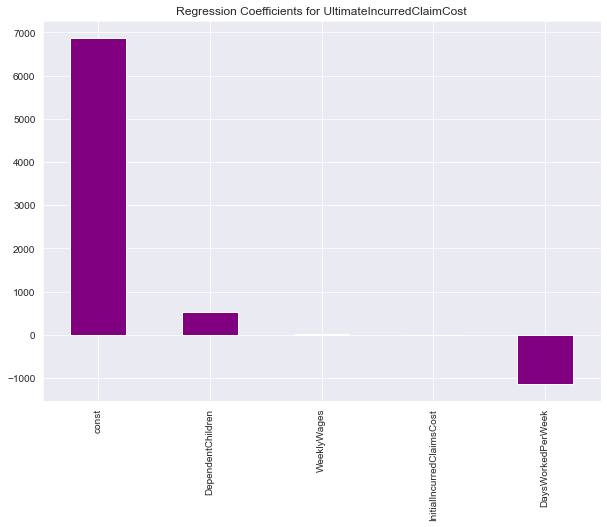

In [76]:
plt.figure(figsize=(10,7))
regression_model.params.sort_values(ascending=False).plot(kind="bar", title= "Regression Coefficients for UltimateIncurredClaimCost", color="purple")

## Conclusion

#### Overall analysis of this dataset shows that prediction of Ultimate Incurred Claim Cost can vary depend on values of metrices: Dependent Children, Weekly Wages, Initial Cost and Days worked per week
DependentChildren tend to have a stronger relationship with Ultimate Incurred Claim Cost,also older people tend to have more Ultimate Cost.